<IPython.core.display.Javascript object>


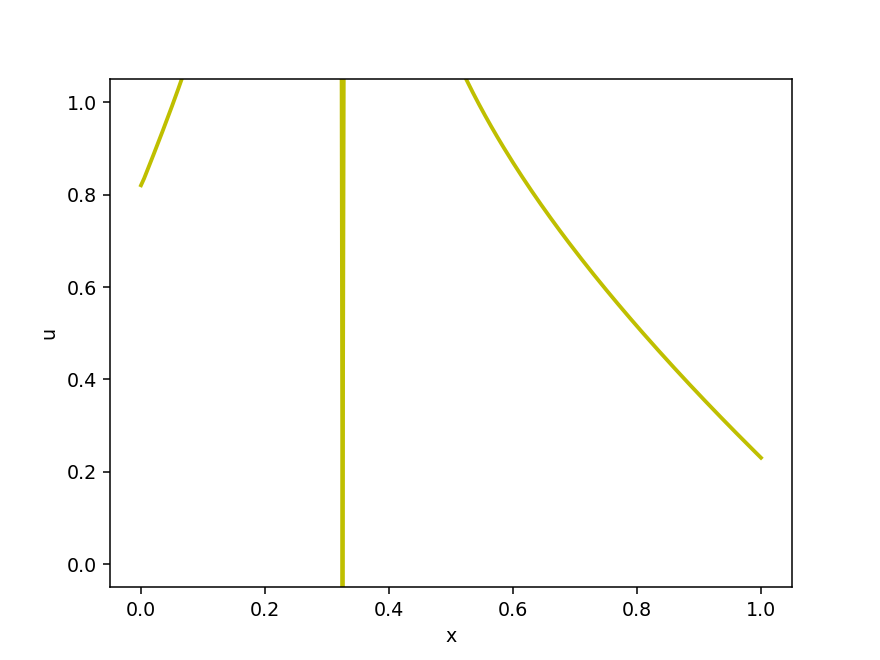

In [3]:
%matplotlib notebook

from numpy import zeros, linspace, exp, eye, linalg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def u_init(x):
    return -x + 1.

def u_left(t):
    return exp(-t)

def f(y, t, h, u_left):
    f = zeros(N)
    f[0] = -y[0] * (y[0] - u_left(t)) / h + exp(y[0] ** 2)
    for n in range(1, N):
        f[n] = -y[n] * (y[n] - y[n - 1]) / h + exp(y[n] ** 2)
    return f

def f_y(y, t, h, u_left):
    f_y = zeros((N, N))
    f_y[0, 0] = (-2 * y[0] + u_left(t)) / h + 2 * y[0] * exp(y[0] ** 2)
    for n in range(1, N):
        f_y[n, n] = (-2 * y[n] + y[n - 1]) / h + 2 * y[n] * exp(y[n] ** 2)
        f_y[n, n - 1] = y[n] / h
    return f_y

a = 0.
b = 1.
t_0 = 0.
T = 0.3
alpha = (1 + 1j) / 2
N = 200
M = 100

h = (b - a) / N
x = linspace(a, b, N + 1)

tau = (T - t_0) / M
t = linspace(t_0, T, M + 1)

u = zeros((M + 1, N + 1))
y = zeros((M + 1, N))

for n in range(N + 1):
    u[0, n] = u_init(x[n])
y[0] = u[0, 1:N + 1]

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u')
line, = ax.plot(x, u[0], color='y', ls='-', lw=2)

def update(frame):
    global y, u
    m = frame
    w_1 = linalg.solve(eye(N) - alpha * tau * f_y(y[m], t[m], h, u_left), f(y[m], t[m] + tau / 2, h, u_left))
    y[m + 1] = y[m] + tau * w_1.real
    u[m + 1, 0] = u_left(t[m])
    u[m + 1, 1:N + 1] = y[m + 1]
    line.set_ydata(u[m + 1])
    return (line,)

ani = FuncAnimation(fig, update, frames=M, blit=True)
plt.show()
